In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IDS

# Library Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Data Imports and Processing 

In [58]:
data = pd.read_csv('/content/drive/MyDrive/GWAR /Copy of train_flooding_data.csv')
data

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.100845e+07,id3,0.200000,1.000000,NaN,NaN
1,0,8.100846e+07,id9,0.370003,NaN,NaN,NaN
2,0,8.100846e+07,id7,0.044139,0.000000,NaN,NaN
3,0,8.100846e+07,id8,0.170534,NaN,NaN,NaN
4,0,8.100846e+07,id5,0.173044,0.874886,NaN,NaN
...,...,...,...,...,...,...,...
2060637,0,8.460901e+07,id3,0.800000,0.994632,NaN,NaN
2060638,0,8.460901e+07,id8,0.186921,NaN,NaN,NaN
2060639,0,8.460901e+07,id4,0.002720,NaN,NaN,NaN
2060640,0,8.460901e+07,id2,0.005368,0.569341,0.182597,NaN


In [4]:
data = data.fillna(-.0000001)

In [5]:
encoder = LabelEncoder()
data['ID_encoded'] = encoder.fit_transform(data['ID'])

In [6]:
data = data.drop('ID', axis =1)

In [7]:
X_train = data.iloc[:,1:].values
Y_train = data.iloc[:,0].values
X_train

array([[ 8.10084494e+07,  2.00000000e-01,  1.00000000e+00,
        -1.00000000e-07, -1.00000000e-07,  3.00000000e+00],
       [ 8.10084568e+07,  3.70002961e-01, -1.00000000e-07,
        -1.00000000e-07, -1.00000000e-07,  9.00000000e+00],
       [ 8.10084582e+07,  4.41385209e-02,  0.00000000e+00,
        -1.00000000e-07, -1.00000000e-07,  7.00000000e+00],
       ...,
       [ 8.46090074e+07,  2.72000000e-03, -1.00000000e-07,
        -1.00000000e-07, -1.00000000e-07,  4.00000000e+00],
       [ 8.46090083e+07,  5.36823693e-03,  5.69341091e-01,
         1.82596545e-01, -1.00000000e-07,  2.00000000e+00],
       [ 8.46090154e+07,  5.64148088e-01,  2.50000000e-01,
        -1.00000000e-07, -1.00000000e-07,  0.00000000e+00]])

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [9]:

df_test = pd.read_csv('/content/drive/MyDrive/GWAR /Copy of test_flooding_data (1).csv')

In [10]:
df_test

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.460902e+07,id7,0.053403,0.500000,NaN,NaN
1,0,8.460902e+07,id5,0.130537,0.999369,NaN,NaN
2,0,8.460902e+07,id6,1.000000,0.888889,NaN,NaN
3,0,8.460902e+07,id3,1.000000,0.994632,NaN,NaN
4,0,8.460902e+07,id8,0.187604,NaN,NaN,NaN
...,...,...,...,...,...,...,...
515156,0,8.550892e+07,id10,0.336289,0.555556,0.913794,0.352531
515157,0,8.550892e+07,id8,0.215258,NaN,NaN,NaN
515158,0,8.550892e+07,id4,0.233920,NaN,NaN,NaN
515159,0,8.550892e+07,id3,0.800000,1.000000,NaN,NaN


In [11]:
encoder = LabelEncoder()
df_test['ID_encoded'] = encoder.fit_transform(df_test['ID'])

In [12]:
df_test1 = df_test.drop('ID', axis =1)

In [13]:
df_test1 = df_test1.fillna(-.0000001)

In [14]:
X_test = df_test1.iloc[:,1:].values
Y_test = df_test1.iloc[:,0].values

In [15]:
X_test = sc.transform(X_test)

# Modeling 

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the LSTM layer
class LSTM:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.bf = np.random.randn(hidden_size, 1)
        self.bi = np.random.randn(hidden_size, 1)
        self.bo = np.random.randn(hidden_size, 1)
        self.bc = np.random.randn(hidden_size, 1)
        self.h = np.zeros((hidden_size, 1))
        self.c = np.zeros((hidden_size, 1))
    
    def forward(self, x):
        self.x = x
        self.concatenate_input = np.concatenate((self.h, x), axis=0)
        self.f = sigmoid(np.dot(self.Wf, self.concatenate_input) + self.bf)
        self.i = sigmoid(np.dot(self.Wi, self.concatenate_input) + self.bi)
        self.o = sigmoid(np.dot(self.Wo, self.concatenate_input) + self.bo)
        self.c_hat = np.tanh(np.dot(self.Wc, self.concatenate_input) + self.bc)
        self.c = self.f * self.c + self.i * self.c_hat
        self.h = self.o * np.tanh(self.c)
        return self.h
    
    def backward(self, dh_next, dc_next):
        do = np.tanh(self.c) * dh_next
        dc = self.o * (1 - np.tanh(self.c) ** 2) * dh_next + dc_next
        df = self.c * dc
        di = self.c_hat * dc
        dc_hat = self.i * dc
        d_concatenate_input = np.dot(self.Wf.T, df) + np.dot(self.Wi.T, di) + np.dot(self.Wo.T, do) + np.dot(self.Wc.T, dc_hat)
        dh_prev = d_concatenate_input[:self.hidden_size, :]
        dx = d_concatenate_input[self.hidden_size:, :]
        return dh_prev, dc
    
# Define the LSTM model
class LSTMModel:
    def __init__(self, input_size, hidden_size):
        self.lstm = LSTM(input_size, hidden_size)
        self.fc = np.random.randn(1, hidden_size)
    
    def forward(self, x):
        h = self.lstm.forward(x)
        y = np.dot(self.fc, h)
        return y
    
    def backward(self, dy):
        dh = np.dot(self.fc.T, dy)
        dh_prev, dc_prev = self.lstm.backward(dh, np.zeros_like(self.lstm.c))
        return dh_prev, dc_prev
    
# Define the training loop
def train(X_train_seq, y_train_seq, epochs, learning_rate):
    input_size = X_train_seq.shape[2]
    hidden_size = 128
    model = LSTMModel(input_size, hidden_size)
    
    for epoch in range(epochs):
        loss = 0
        for i in range(len(X_train_seq)):
            x = X_train_seq[i].T
            y_true = y_train_seq[i]
            
            # Forward pass
                    y_pred = model.forward(x)
        
        # Calculate loss
        loss += np.square(y_pred - y_true)
        
        # Backward pass
        dy = 2 * (y_pred - y_true)
        dh_prev, dc_prev = model.backward(dy)
        
        # Update parameters
        model.lstm.Wf -= learning_rate * model.lstm.f * (1 - model.lstm.f) * np.dot(dh_prev * model.lstm.c, np.concatenate((model.lstm.h, x), axis=0).T)
        model.lstm.Wi -= learning_rate * model.lstm.i * (1 - model.lstm.i) * np.dot(dh_prev * model.lstm.c_hat, np.concatenate((model.lstm.h, x), axis=0).T)
        model.lstm.Wo -= learning_rate * model.lstm.o * (1 - model.lstm.o) * np.dot(dh_prev * np.tanh(model.lstm.c), np.concatenate((model.lstm.h, x), axis=0).T)
        model.lstm.Wc -= learning_rate * (1 - np.tanh(model.lstm.c) ** 2) * np.dot(dc_prev * model.lstm.i, np.concatenate((model.lstm.h, x), axis=0).T)
        model.lstm.bf -= learning_rate * model.lstm.f * (1 - model.lstm.f) * dh_prev * model.lstm.c
        model.lstm.bi -= learning_rate * model.lstm.i * (1 - model.lstm.i) * dh_prev * model.lstm.c_hat
        model.lstm.bo -= learning_rate * model.lstm.o * (1 - model.lstm.o) * dh_prev * np.tanh(model.lstm.c)
        model.lstm.bc -= learning_rate * (1 - np.tanh(model.lstm.c) ** 2) * dc_prev * model.lstm.i
        model.fc -= learning_rate * np.dot(dy, model.lstm.h.T)
    
    # Print epoch loss
    print(f"Epoch {epoch + 1} Loss: {loss}")

return model



## Sequence Creation

In [16]:
def create_sequences(data, seq_length):
    sequences = []
    data_length = len(data)
    
    for i in range(data_length - seq_length + 1):
        sequences.append(data[i:i + seq_length])
        
    return np.array(sequences)


In [17]:

sequence_length = 10
X_train_seq = create_sequences(X_train, sequence_length)
X_test_seq = create_sequences(X_test, sequence_length)

# Adjust y_train and y_test to match the sequence length
y_train_seq = Y_train[sequence_length - 1:]
y_test_seq = Y_test[sequence_length - 1:]


In [18]:
# Check for data imbalance in train set
val, freq = np.unique(y_train_seq, return_counts=True)
val, freq/len(y_train_seq)

(array([0, 1]), array([0.69551007, 0.30448993]))

In [19]:
# Check for data imbalance in test set
val, freq = np.unique(y_test_seq, return_counts=True)
val, freq/len(y_test_seq)

(array([0, 1]), array([0.70536463, 0.29463537]))

## Modeling 

In [20]:
from keras.layers import Masking

n_features = X_train.shape[1]
mask_value = -0.0000001

model1 = Sequential([
    Masking(mask_value=mask_value, input_shape=(sequence_length, n_features)),
    LSTM(128, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(1, activation='sigmoid')
])

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 10, 6)             0         
                                                                 
 lstm (LSTM)                 (None, 10, 128)           69120     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train_seq, y_train_seq, epochs=1, batch_size=128, validation_split=0.1, verbose=1)

14489/14489 [==============================] - 1076s 74ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.0250 - val_accuracy: 0.9921


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Testing 

In [24]:
y_pred_sigmoid = model1.predict(X_test_seq)

y_pred_sigmoid = y_pred_sigmoid.flatten()

y_pred = []
for i in y_pred_sigmoid:
  if i >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

16099/16099 [==============================] - 189s 12ms/step


In [25]:
y_test_seq = y_test_seq.tolist()
y_train_seq = y_train_seq.tolist()

#Evaluation

In [30]:
# Test Scores
from sklearn.metrics import f1_score, matthews_corrcoef

print("Accuracy:", accuracy_score(y_test_seq, y_pred))
print("F1 Score:", f1_score(y_test_seq, y_pred))
print("MCC Score:", matthews_corrcoef(y_test_seq, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_seq, y_pred))
print()
print("Classification Report:\n", classification_report(y_test_seq, y_pred))

Accuracy: 0.9862196012050812
F1 Score: 0.9769900719242576
MCC Score: 0.9674125576280863

Confusion Matrix:
 [[357343   6027]
 [  1072 150710]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    363370
           1       0.96      0.99      0.98    151782

    accuracy                           0.99    515152
   macro avg       0.98      0.99      0.98    515152
weighted avg       0.99      0.99      0.99    515152



In [31]:
from sklearn.metrics import roc_auc_score

# Assuming you have predicted probabilities stored in y_pred_probs
roc_auc = roc_auc_score(y_test_seq, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9881754196985633


In [32]:
cf_matrix = confusion_matrix(y_test_seq, y_pred)

cf_matrix_percent = [cf_matrix[0]/(cf_matrix[0,0]+cf_matrix[0,1]), cf_matrix[1]/(cf_matrix[1,0]+cf_matrix[1,1])]

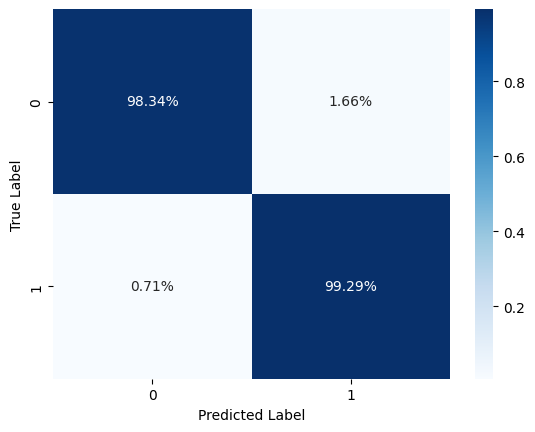

In [33]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test_seq, y_pred)

sns.heatmap(cf_matrix_percent, annot=True, 
            fmt='.2%', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

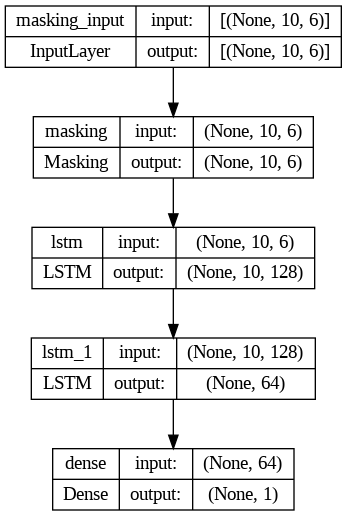

In [34]:
# pip install pydot graphviz
from keras.utils import plot_model

# Assuming you have a model called 'model'
plot_model(model1, to_file='model.png', show_shapes=True, show_layer_names=True)

# DEMO

In [57]:
input_sequence = pd.read_excel('/content/drive/MyDrive/GWAR /test.xlsx')

In [45]:
input_sequence = input_sequence.fillna(-.0000001)
encoder = LabelEncoder()
input_sequence['ID_encoded'] = encoder.fit_transform(input_sequence['ID'])


In [46]:
input_sequence = input_sequence.drop('ID', axis =1)


In [47]:
preprocessed_sequence = sc.transform(input_sequence)
input_sequence_seq = create_sequences(preprocessed_sequence, sequence_length)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [48]:
input_sequence_seq = input_sequence_seq.reshape(1, sequence_length, n_features)

# Make the prediction
prediction = model1.predict(input_sequence_seq)

1/1 [==============================] - 0s 62ms/step


In [59]:
RED_COLOR = "\033[91m"
BOLD_FORMAT = "\033[1m"
END_FORMAT = "\033[0m"
BIGGER_SIZE_FORMAT = "\033[5;30;48m"

# Interpret the prediction
intrusion_threshold = 0.5

In [60]:

if prediction[0] >= intrusion_threshold:
    print(RED_COLOR + BOLD_FORMAT +"The input sequence is classified as an intrusion."+ END_FORMAT)
else:

# Print the message in red color and bold
  print(RED_COLOR + BOLD_FORMAT + "The input sequence is classified as non-intrusion." + END_FORMAT)

    # print("The input sequence is classified as non-intrusion.")

The input sequence is classified as an intrusion.


# LSTM Autoencoder (Anomaly Detection)


In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

In [ ]:
# Encoder
inputs = Input(shape=(sequence_length, n_features))
encoded_1 = LSTM(256, activation='relu', return_sequences=True)(inputs)
encoded_2 = LSTM(128, activation='relu')(encoded_1)

# Decoder
decoded_1 = RepeatVector(sequence_length)(encoded_2)
decoded_2 = LSTM(128, activation='relu', return_sequences=True)(decoded_1)
decoded_3 = LSTM(256, activation='relu', return_sequences=True)(decoded_2)
decoded_output = TimeDistributed(Dense(n_features))(decoded_3)

In [ ]:
# Autoencoder
autoencoder = Model(inputs, decoded_output)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 256)           269312    
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 repeat_vector (RepeatVector  (None, 10, 128)          0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 10, 128)           131584    
                                                                 
 lstm_5 (LSTM)               (None, 10, 256)           394240    
                                                             

In [ ]:
history = autoencoder.fit(X_train_seq, X_train_seq, epochs=1, batch_size=128, validation_split=0.1, verbose=1)

# Get the encoded representations of the input sequences
encoder = Model(inputs, encoded_2)
X_train_encoded = encoder.predict(X_train_seq)
X_test_encoded = encoder.predict(X_test_seq)

16099/16099 [==============================] - 390s 24ms/step


In [ ]:
X_train_encoded

array([[0.6393987 , 1.2123374 , 1.6803235 , ..., 0.26901847, 0.        ,
        0.5782776 ],
       [0.75577116, 2.986523  , 1.2950375 , ..., 0.39004454, 0.        ,
        2.3094146 ],
       [0.7580389 , 1.521149  , 1.0211856 , ..., 1.2472389 , 0.        ,
        2.2716267 ],
       ...,
       [0.6594277 , 2.5494711 , 2.1801052 , ..., 0.7577974 , 0.        ,
        3.386123  ],
       [0.27654454, 1.0989828 , 1.295506  , ..., 1.0097017 , 0.        ,
        1.9101582 ],
       [0.46729276, 2.1021616 , 1.546992  , ..., 0.50458694, 0.        ,
        1.0326456 ]], dtype=float32)

In [ ]:
# Calculate the reconstruction error of the autoencoder on the test set
mse = autoencoder.evaluate(X_test_seq, X_test_seq, verbose=0)

# Print the reconstruction error
print("Reconstruction error:", mse)


# Predict the reconstructed sequences using the trained autoencoder
X_test_pred = autoencoder.predict(X_test_seq)

# Calculate the mean squared error between the predicted and original sequences
mse = np.mean(np.power(X_test_seq - X_test_pred, 2), axis=1)

# Print the reconstruction error
print("Reconstruction error:", mse)


Reconstruction error: 0.037130992859601974
16099/16099 [==============================] - 718s 45ms/step
Reconstruction error: [[1.20186035e-02 1.18067542e-02 1.39495731e-02 3.29877975e-04
  4.52893430e-05 4.26276374e-03]
 [1.27597968e-02 9.39255147e-03 7.94315363e-03 2.09452703e-04
  2.94605510e-05 3.86890355e-03]
 [1.33457646e-02 1.14085530e-02 1.42497566e-02 5.01540162e-04
  4.92854641e-05 3.75754291e-03]
 ...
 [8.07858391e-02 7.01926249e-02 1.18086153e-01 2.79057272e-03
  3.36458197e-02 1.55330193e-02]
 [7.56954234e-02 8.85467167e-02 9.96829394e-02 2.21443562e-03
  8.12076963e-03 2.96215672e-02]
 [7.85824338e-02 9.18220958e-02 1.46668668e-01 5.65507137e-03
  1.99943163e-03 5.16462573e-02]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report

# Train a classifier using the encoded features
classifier = LogisticRegression()
classifier.fit(X_train_encoded, y_train_seq)

# Predict on the test set using the classifier
y_pred = classifier.predict(X_test_encoded)

# Test Scores
print("Accuracy:", accuracy_score(y_test_seq, y_pred))
print("F1 Score:", f1_score(y_test_seq, y_pred))
print("MCC Score:", matthews_corrcoef(y_test_seq, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test_seq, y_pred))
print()
print("Classification Report:\n", classification_report(y_test_seq, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8450534987731776
F1 Score: 0.6856587025609319
MCC Score: 0.6082946714324563

Confusion Matrix:
 [[348276  15094]
 [ 64727  87055]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90    363370
           1       0.85      0.57      0.69    151782

    accuracy                           0.85    515152
   macro avg       0.85      0.77      0.79    515152
weighted avg       0.85      0.85      0.83    515152



In [ ]:
cf_matrix = confusion_matrix(y_test_seq, y_pred)

cf_matrix_percent = [cf_matrix[0]/(cf_matrix[0,0]+cf_matrix[0,1]), cf_matrix[1]/(cf_matrix[1,0]+cf_matrix[1,1])]

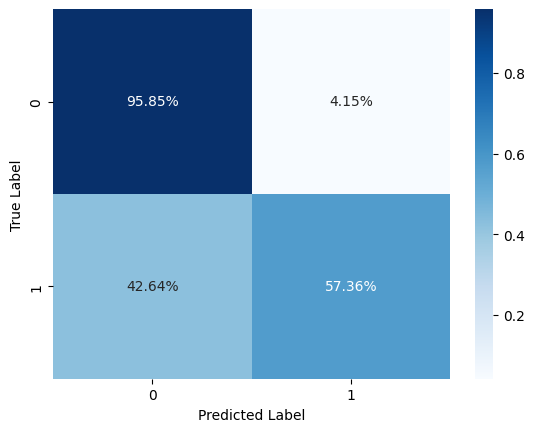

In [ ]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test_seq, y_pred)

sns.heatmap(cf_matrix_percent, annot=True, 
            fmt='.2%', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

No Model: ROC AUC=0.500
LSTM: ROC AUC=0.766


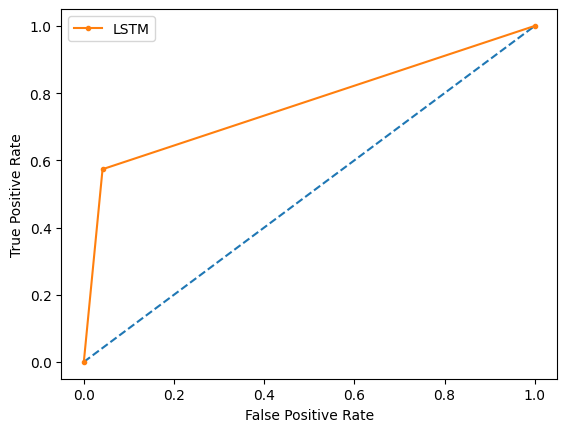

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test_seq))]

# calculate scores
ns_auc = roc_auc_score(y_test_seq, ns_probs)
lr_auc = roc_auc_score(y_test_seq, y_pred)

# summarize scores
print('No Model: ROC AUC=%.3f' % (ns_auc))
print('LSTM: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_seq, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_seq, y_pred)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LSTM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
f1_test = f1_score(y_test_seq, y_pred).round(3)
mcc_test = matthews_corrcoef(y_test_seq, y_pred).round(3)

f1_train = f1_score(y_train_seq, y_pred_train).round(3)
mcc_train = matthews_corrcoef(y_train_seq, y_pred_train).round(3)

NameError: ignored

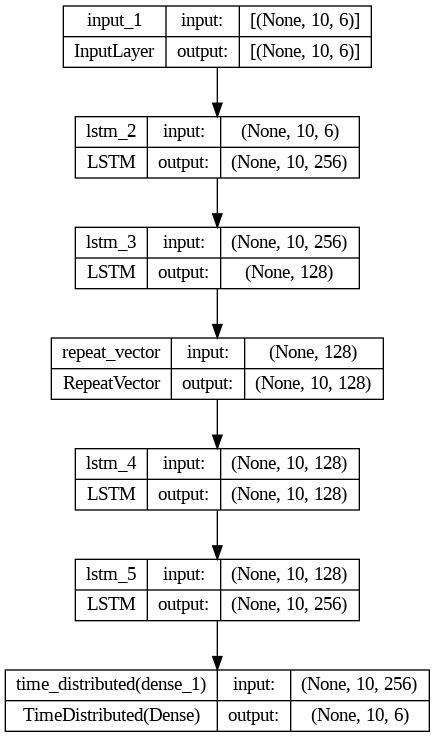

In [ ]:
from keras.utils import plot_model

# Assuming you have a model called 'model'
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)
